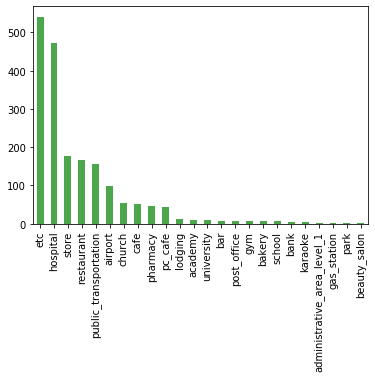

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

import warnings
warnings.filterwarnings("ignore")
     
time_age = pd.read_csv(r'./data/PatientInfo.csv')
patient_route = pd.read_csv(r'./data/PatientRoute.csv')

joined_df = time_age.merge(patient_route, left_on = 'patient_id', right_on = 'patient_id', how = 'inner')
joined_df = joined_df[joined_df.age.notnull()]
joined_df = joined_df[joined_df.age=='20s']
# print(joined_df.type.value_counts())

value = joined_df.type.value_counts()   
value = value.sort_values(ascending=False)
value.plot.bar(color='green', alpha = 0.7)

plt.show()

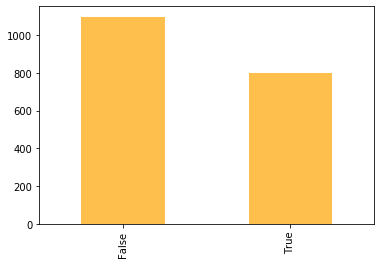

In [119]:
many_people_place = ['hospital','public_transportation', 'airport', 'church', 'university','school','park']
len(many_people_place)

def ismany(x):
    if x in many_people_place:
        res = True
    else : 
        res = False
    return res

joined_df['is_many'] = joined_df['type'].apply(lambda x: ismany(x))
joined_df = joined_df[['patient_id', 'type', 'is_many']]

joined_df.is_many.value_counts().plot.bar(color='orange', alpha = 0.7)